In [1]:
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

# Data Preproccessing (Converting Images to Arrays)

In [2]:
# Parameters
image_size = (150, 150)  # Resize all images to 32x32
dataset_path = "train/"  # Path to your dataset folder

# Initialize empty lists to store data
images = []
labels = []

# Loop through each folder
for category in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, category)
    label = 0 if category == "Female" else 1  # Assign labels based on folder name
    
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        
        # Load and preprocess the image
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img) / 255.0  # Convert to array and normalize
        images.append(img_array)
        labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

In [3]:
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

Images shape: (850, 150, 150, 3)
Labels shape: (850,)


0


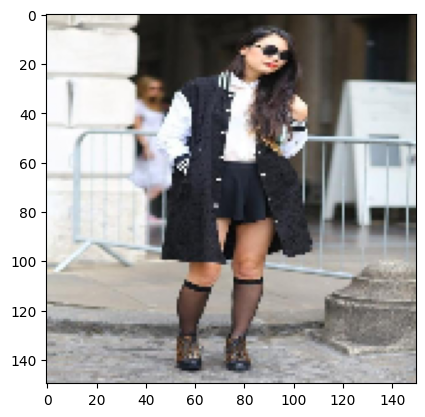

In [4]:
print(labels[0])
plt.imshow(images[0])

0


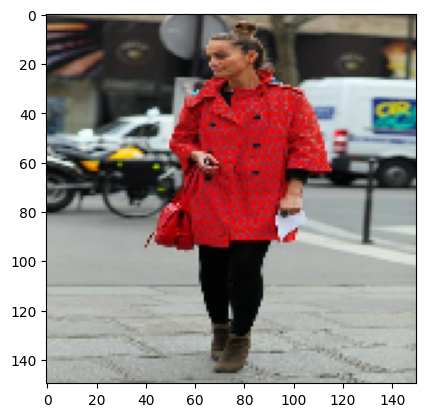

In [5]:
print(labels[45])
plt.imshow(images[45])

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Training set: {X_test.shape}, {y_test.shape}")

Training set: (680, 150, 150, 3), (680,)
Training set: (170, 150, 150, 3), (170,)


In [8]:
y_train = y_train.reshape(len(y_train), 1)
y_test = y_test.reshape(len(y_test), 1)

print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Training set: {X_test.shape}, {y_test.shape}")

Training set: (680, 150, 150, 3), (680, 1)
Training set: (170, 150, 150, 3), (170, 1)


# Training CNN

In [10]:
CNN = models.Sequential([
    #CNN
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(150,150,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #Dense Network
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

CNN.compile(
    optimizer = 'adam', 
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

CNN.fit(X_train, y_train, epochs = 10)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 199ms/step - accuracy: 0.7494 - loss: 1.1077
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 208ms/step - accuracy: 0.8276 - loss: 0.4556
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.8030 - loss: 0.4831
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 197ms/step - accuracy: 0.8122 - loss: 0.4523
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step - accuracy: 0.8142 - loss: 0.4238
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.8034 - loss: 0.4002
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 202ms/step - accuracy: 0.7994 - loss: 0.3733
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - accuracy: 0.8237 - loss: 0.3240
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 200ms/step - accuracy: 0.8854 - loss: 0.2719
Epoch 10/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 203ms/step - accuracy: 0.9144 - loss: 0.2440


In [11]:
CNN.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8277 - loss: 0.4604


[0.45986679196357727, 0.8176470398902893]

# Making Random Predictions

In [12]:
import random

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Our Model Predicted it's a Female


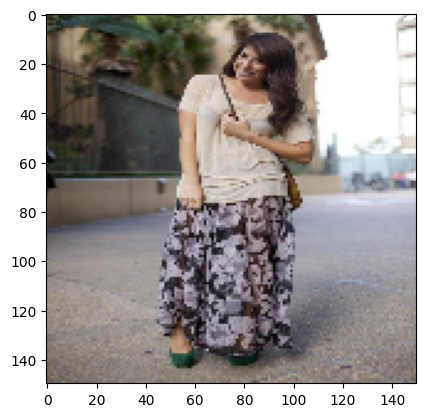

In [24]:
idx = random.randint(0, len(y_test))
plt.imshow(X_test[idx])
plt.show

y_pred = CNN.predict(X_test[idx].reshape(1, 150,150,3))
if y_pred > 0.5:
    pred = 'Male'
else:
    pred = 'Female'
print(f"Our Model Predicted it's a {pred}")